# Using NLP to categorize the all known debunked rumours
The following notebook shows a functional method to categorize all rumours that have been proven to be true or false as of the completion of this research into the 10 categories agreed to by Reuters.

In [65]:
import pandas as pd
import numpy as np
np.random.seed(1234)
df = pd.read_json('debunk.json', encoding='utf-8')

In [66]:
df.head()

,Claim,Country,Date,Debunk_Date,Explaination,Factcheck_Org,Label,Link,Source,Source_Lang
0,\n Chinese state media claims Ghana’s coronavi...,Ghana,2020-04-13,2020/04/13,Official Ghana government data contradicts the...,GhanaFact,FALSE,https://www.poynter.org/?ifcn_misinformation=c...,https://ghanafact.com/false-chinese-state-medi...,en
1,\n Video: Migrant labourers in Kerala gambling...,India,2020-04-11,2020/04/11,An old and unrelated video is used to make the...,FactCrescendo,FALSE,https://www.poynter.org/?ifcn_misinformation=v...,https://www.malayalam.factcrescendo.com/old-an...,ml
2,\n Coronavirus can be avoided by eating nigell...,India,2020-04-11,2020/04/11,Hydroxychloroquine is not present in the subst...,Newschecker,FALSE,https://www.poynter.org/?ifcn_misinformation=c...,https://www.newschecker.in/article/news-detail...,hi
3,\n ICMR issued a report claiming the number of...,India,2020-04-11,2020/01/01,ICMR did not publish any such report about the...,Vishvas News,FALSE,https://www.poynter.org/?ifcn_misinformation=i...,https://www.facebook.com/groups/dsdrss/permali...,en
4,\n Sanitize masks by microwaving them for 2-3 ...,Colombia,2020-04-11,2020/04/15,Fabric masks should not be sanitized by microw...,Vishvas News,FALSE,https://www.poynter.org/?ifcn_misinformation=s...,https://www.vishvasnews.com/english/health/fac...,hi


Before further work, the data needs to be preprocessed.

In [67]:
#df_new = df[df.Source_Lang.eq('en')].copy() #only use English-based rumours
df_new = df.copy()
df_new['Claim'] = df_new['Claim'].str.replace(r'[_\W\d]',' ')
df_new.reindex()
df_new.head()

,Claim,Country,Date,Debunk_Date,Explaination,Factcheck_Org,Label,Link,Source,Source_Lang
0,Chinese state media claims Ghana s coronavir...,Ghana,2020-04-13,2020/04/13,Official Ghana government data contradicts the...,GhanaFact,FALSE,https://www.poynter.org/?ifcn_misinformation=c...,https://ghanafact.com/false-chinese-state-medi...,en
1,Video Migrant labourers in Kerala gambling ...,India,2020-04-11,2020/04/11,An old and unrelated video is used to make the...,FactCrescendo,FALSE,https://www.poynter.org/?ifcn_misinformation=v...,https://www.malayalam.factcrescendo.com/old-an...,ml
2,Coronavirus can be avoided by eating nigella...,India,2020-04-11,2020/04/11,Hydroxychloroquine is not present in the subst...,Newschecker,FALSE,https://www.poynter.org/?ifcn_misinformation=c...,https://www.newschecker.in/article/news-detail...,hi
3,ICMR issued a report claiming the number of ...,India,2020-04-11,2020/01/01,ICMR did not publish any such report about the...,Vishvas News,FALSE,https://www.poynter.org/?ifcn_misinformation=i...,https://www.facebook.com/groups/dsdrss/permali...,en
4,Sanitize masks by microwaving them for m...,Colombia,2020-04-11,2020/04/15,Fabric masks should not be sanitized by microw...,Vishvas News,FALSE,https://www.poynter.org/?ifcn_misinformation=s...,https://www.vishvasnews.com/english/health/fac...,hi


In [16]:
df_new['Claim'][0]

'  Chinese state media claims Ghana s coronavirus cases have surpassed        with over     deaths   '

In [17]:
import nltk
from nltk.tokenize import word_tokenize 
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.lancaster import LancasterStemmer
import string
import gensim
from nltk.tokenize import sent_tokenize
from nltk.stem import WordNetLemmatizer

def clean_text(content_collection):
    wordnet_lemmatizer = WordNetLemmatizer()
    porter = PorterStemmer()
    lan_porter = LancasterStemmer()
    stop_words = set(stopwords.words('english'))
    clean_content=[]
    for content in content_collection:
        #turn string into tokens
        word_tokens = word_tokenize(content)
        words = [porter.stem(wordnet_lemmatizer.lemmatize(w.lower())) for w in word_tokens if w not in stop_words] #remove stop words
        #lowercase, remove stop words and punctuation/numbers
        clean_content.append( [w for w in words if len(w) > 3] ) 
    return clean_content
clean_content = clean_text(df_new['Claim'])
clean_content

[['chines',
  'state',
  'medium',
  'claim',
  'ghana',
  'coronaviru',
  'case',
  'surpass',
  'death'],
 ['video',
  'migrant',
  'labour',
  'kerala',
  'gambl',
  'huge',
  'stash',
  'cash',
  'amid',
  'lockdown'],
 ['coronaviru',
  'avoid',
  'nigella',
  'honey',
  'contain',
  'hydroxychloroquin',
  'hydroxychloroquin',
  'treat',
  'coronaviru'],
 ['icmr',
  'issu',
  'report',
  'claim',
  'number',
  'peopl',
  'infect',
  'thte',
  'coronaviru',
  'increas',
  'lakh',
  'india',
  'announc',
  'lockdown'],
 ['sanit', 'mask', 'microwav', 'minut'],
 ['hindu', 'rajasthan', 'kill', 'muslim', 'amidst', 'lockdown'],
 ['israel',
  'death',
  'covid',
  'made',
  'lemon',
  'bicarbon',
  'cure',
  'coronaviru'],
 ['mustard', 'kill', 'coronaviru'],
 ['imran', 'khan', 'wife', 'test', 'posit', 'covid'],
 ['poster',
  'allegedli',
  'contain',
  'guidelin',
  'covid',
  'issu',
  'ministri',
  'health',
  'famili',
  'welfar',
  'india'],
 ['whatsapp',
  'forward',
  'along',
  'vid

In [18]:
from gensim.utils import simple_preprocess

#alternative way
def bigrams(words, bi_min=15, tri_min=10):
    bigram = gensim.models.Phrases(words, min_count = bi_min)
    bigram_mod = gensim.models.phrases.Phraser(bigram)
    return bigram_mod

def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

def strip_newline(series):
    return [review.replace('\n','') for review in series]

df['Claim'] = strip_newline(df['Claim'])
words = list(sent_to_words(df['Claim']))
words = remove_stopwords(words)
bigram = bigrams(words)
bigram = [bigram[review] for review in words]
words = sent_to_words(m)

NameError: name 'stop_words' is not defined

In [22]:
import gensim
import gensim.corpora as corpora
dictionary = gensim.corpora.Dictionary(clean_content)
dictionary.filter_extremes(no_below=15, no_above=0.1, keep_n= 100000)

In [23]:
bow_corpus = [dictionary.doc2bow(doc) for doc in clean_content]

In [24]:
for i in range(len(bow_corpus[0])):
    print("Word {} (\"{}\") appears {} time.".format(bow_corpus[0][i][0], 
                                                     dictionary[bow_corpus[0][i][0]], 
                                                     bow_corpus[0][i][1]))

Word 0 ("case") appears 1 time.
Word 1 ("chines") appears 1 time.
Word 2 ("claim") appears 1 time.
Word 3 ("death") appears 1 time.
Word 4 ("medium") appears 1 time.
Word 5 ("state") appears 1 time.


In [32]:
lda_model =  gensim.models.LdaMulticore(bow_corpus, 
                                   num_topics = 30, 
                                   id2word = dictionary,                                    
                                   passes = 10,
                                   workers = 2,
                                   random_state = 1234 )

In [44]:
topics = []
for idx, topic in lda_model.print_topics(-1):
    topics.append(topic)
    print("Topic: {} \nWords: {}".format(idx, topic ))
    print("\n")

Topic: 0 
Words: 0.165*"presid" + 0.095*"said" + 0.082*"trump" + 0.070*"minist" + 0.055*"prime" + 0.051*"countri" + 0.050*"donald" + 0.038*"year" + 0.037*"visit" + 0.026*"mosqu"


Topic: 1 
Words: 0.110*"post" + 0.102*"claim" + 0.097*"facebook" + 0.087*"share" + 0.075*"novel" + 0.066*"time" + 0.053*"twitter" + 0.049*"multipl" + 0.033*"thousand" + 0.025*"show"


Topic: 2 
Words: 0.118*"imag" + 0.073*"patient" + 0.068*"human" + 0.057*"made" + 0.054*"china" + 0.043*"doctor" + 0.039*"armi" + 0.033*"claim" + 0.031*"suggest" + 0.031*"discov"


Topic: 3 
Words: 0.183*"hospit" + 0.040*"photo" + 0.039*"work" + 0.039*"death" + 0.038*"show" + 0.036*"child" + 0.035*"wuhan" + 0.033*"away" + 0.032*"infect" + 0.032*"spain"


Topic: 4 
Words: 0.206*"itali" + 0.063*"video" + 0.060*"bodi" + 0.055*"market" + 0.055*"wuhan" + 0.054*"victim" + 0.053*"dead" + 0.050*"show" + 0.030*"famili" + 0.029*"china"


Topic: 5 
Words: 0.071*"chloroquin" + 0.067*"home" + 0.063*"former" + 0.058*"avoid" + 0.047*"advis" + 0

In [45]:

m = lda_model.get_document_topics(bow_corpus)
matches = np.zeros(30)
data = []
for i in range(len(m)):
    prob_topics = m[i]
    if prob_topics:
        matches[prob_topics[0][0]] += 1
        prob_topics.sort(key=lambda x: x[1], reverse=True)
        data.append([df_new['Claim'][i], prob_topics[0][0], topics[prob_topics[0][0]] ])
        print("Claim {} matches topic {} with keywords {}".format(data[-1][0], data[-1][1], data[-1][2]))
        print("\n")
        print("\n")
#m.sort(key=lambda x: x[1], reverse=True)

[(14, 0.53138924), (11, 0.19229095), (9, 0.14774756)]
14
Claim   Chinese state media claims Ghana s coronavirus cases have surpassed        with over     deaths    matches topic 14 with keywords 0.071*"social" + 0.070*"medium" + 0.053*"diseas" + 0.049*"univers" + 0.045*"call" + 0.039*"cure" + 0.036*"drug" + 0.035*"death" + 0.035*"claim" + 0.033*"governor"


[(16, 0.50705904), (21, 0.25960457)]
16
Claim   Video  Migrant labourers in Kerala gambling with huges stashes of cash amid lockdown    matches topic 16 with keywords 0.188*"lockdown" + 0.181*"india" + 0.098*"claim" + 0.066*"world" + 0.048*"polic" + 0.047*"video" + 0.046*"viral" + 0.044*"medic" + 0.031*"countri" + 0.025*"april"


[(17, 0.5083299), (5, 0.25833362)]
17
Claim   Coronavirus can be avoided by eating nigella with honey as it contains      hydroxychloroquine  Hydroxychloroquine treats coronavirus    matches topic 17 with keywords 0.195*"outbreak" + 0.054*"disinfect" + 0.052*"book" + 0.049*"treatment" + 0.049*"viral" + 0.04

[(22, 0.29838228), (3, 0.21412787), (12, 0.18662441), (7, 0.17705484)]
22
Claim   Leonardo Da Vinci Hospital  a COVID    reference hospital in Fortaleza  Brazil  is empty  A video  proves  there was no one at the areas open to the public    matches topic 22 with keywords 0.158*"italian" + 0.109*"street" + 0.075*"crisi" + 0.075*"money" + 0.046*"come" + 0.041*"brazil" + 0.035*"doctor" + 0.033*"claim" + 0.031*"govern" + 0.030*"patient"


[(8, 0.39031032), (0, 0.3664854), (29, 0.13070285)]
8
Claim   American citizens have placed a nude statue of President Donald Trump in New York City because he failed to handle the coronavirus situation in USA    matches topic 8 with keywords 0.189*"quarantin" + 0.159*"photo" + 0.124*"show" + 0.094*"citi" + 0.030*"origin" + 0.025*"china" + 0.020*"govern" + 0.020*"video" + 0.019*"mani" + 0.018*"place"


[(23, 0.34444413), (25, 0.3444431), (0, 0.01111117), (1, 0.01111117), (2, 0.01111117), (3, 0.01111117), (4, 0.01111117), (5, 0.01111117), (6, 0.01111117), 

[(22, 0.8388883)]
22
Claim   Italians throwing money on streets amid COVID    crisis    matches topic 22 with keywords 0.158*"italian" + 0.109*"street" + 0.075*"crisi" + 0.075*"money" + 0.046*"come" + 0.041*"brazil" + 0.035*"doctor" + 0.033*"claim" + 0.031*"govern" + 0.030*"patient"


[(8, 0.4547052), (25, 0.21328326), (0, 0.1520099)]
8
Claim   Myanmar president and state counselor are under    days quarantine after meeting with a COVID    patient from Switzerland    matches topic 8 with keywords 0.189*"quarantin" + 0.159*"photo" + 0.124*"show" + 0.094*"citi" + 0.030*"origin" + 0.025*"china" + 0.020*"govern" + 0.020*"video" + 0.019*"mani" + 0.018*"place"


[(4, 0.25833434), (12, 0.2583298), (0, 0.2583296)]
4
Claim   Last picture of Indonesian Dr  Hadio Alo bidding farewell to his family    matches topic 4 with keywords 0.206*"itali" + 0.063*"video" + 0.060*"bodi" + 0.055*"market" + 0.055*"wuhan" + 0.054*"victim" + 0.053*"dead" + 0.050*"show" + 0.030*"famili" + 0.029*"china"


[(5, 0.40



[(0, 0.4824104), (2, 0.19529629), (25, 0.17228991)]
0
Claim   An image accompanies the text  The Italian Prime Minister wept when he recognized that they were losing the battle against the coronavirus    matches topic 0 with keywords 0.165*"presid" + 0.095*"said" + 0.082*"trump" + 0.070*"minist" + 0.055*"prime" + 0.051*"countri" + 0.050*"donald" + 0.038*"year" + 0.037*"visit" + 0.026*"mosqu"


[(26, 0.33449233), (0, 0.1888994), (12, 0.1872437), (6, 0.12496038), (1, 0.071346596), (19, 0.043056674)]
26
Claim   A WhatsApp a video features Rabbi Dan Ben Avraham  International President of the Netzarita AMI Alliance  according to their Twitter  In the video  the rabbi says  the Israeli Minister of Health has officially declared that Israel has the coronavirus vaccine   And  Israel has the vaccine already     matches topic 26 with keywords 0.256*"vaccin" + 0.085*"develop" + 0.075*"compani" + 0.054*"stop" + 0.041*"israel" + 0.037*"creat" + 0.030*"scientist" + 0.028*"alreadi" + 0.027*"china"



[(17, 0.5166651), (0, 0.01666672), (1, 0.01666672), (2, 0.01666672), (3, 0.01666672), (4, 0.01666672), (5, 0.01666672), (6, 0.01666672), (7, 0.01666672), (8, 0.01666672), (9, 0.01666672), (10, 0.01666672), (11, 0.01666672), (12, 0.01666672), (13, 0.01666672), (14, 0.01666672), (15, 0.01666672), (16, 0.01666672), (18, 0.01666672), (19, 0.01666672), (20, 0.01666672), (21, 0.01666672), (22, 0.01666672), (23, 0.01666672), (24, 0.01666672), (25, 0.01666672), (26, 0.01666672), (27, 0.01666672), (28, 0.01666672), (29, 0.01666672)]
17
Claim   A treatment for COVID    will be manufactured in Uganda    matches topic 17 with keywords 0.195*"outbreak" + 0.054*"disinfect" + 0.052*"book" + 0.049*"treatment" + 0.049*"viral" + 0.041*"claim" + 0.036*"contain" + 0.032*"spray" + 0.032*"fake" + 0.031*"predict"


[(12, 0.4706769), (22, 0.19926065), (4, 0.18006122)]
12
Claim   A picture showing dead Italian doctors in an operating theater after succumbing to COVID       matches topic 12 with keywords 0.24

0
Claim   Fill out a      U S  Census form to receive an economic stimulus payment    matches topic 0 with keywords 0.165*"presid" + 0.095*"said" + 0.082*"trump" + 0.070*"minist" + 0.055*"prime" + 0.051*"countri" + 0.050*"donald" + 0.038*"year" + 0.037*"visit" + 0.026*"mosqu"


[(13, 0.8388884)]
13
Claim   Rinsing throat and nose with warm and salt water will prevent the new coronavirus    matches topic 13 with keywords 0.166*"kill" + 0.156*"water" + 0.107*"drink" + 0.053*"salt" + 0.046*"gargl" + 0.044*"warm" + 0.041*"prevent" + 0.040*"everi" + 0.040*"viru" + 0.036*"vinegar"


[(18, 0.3781159), (20, 0.24029574), (8, 0.13029099), (10, 0.110444166), (0, 0.0767497)]
18
Claim   A photo circulating on Facebook in Nigeria appears to show President Muhammadu Buhari shaking hands with the nation s Code of Conduct Bureau Chairman Mohammed Isa while both men are wearing face masks   seemingly against precautions during the novel coronavirus pandemic    matches topic 18 with keywords 0.094*"video

26
Claim   China finds a vaccine for the new coronavirus    matches topic 26 with keywords 0.256*"vaccin" + 0.085*"develop" + 0.075*"compani" + 0.054*"stop" + 0.041*"israel" + 0.037*"creat" + 0.030*"scientist" + 0.028*"alreadi" + 0.027*"china" + 0.026*"found"


[(26, 0.51666635), (0, 0.016666677), (1, 0.016666677), (2, 0.016666677), (3, 0.016666677), (4, 0.016666677), (5, 0.016666677), (6, 0.016666677), (7, 0.016666677), (8, 0.016666677), (9, 0.016666677), (10, 0.016666677), (11, 0.016666677), (12, 0.016666677), (13, 0.016666677), (14, 0.016666677), (15, 0.016666677), (16, 0.016666677), (17, 0.016666677), (18, 0.016666677), (19, 0.016666677), (20, 0.016666677), (21, 0.016666677), (22, 0.016666677), (23, 0.016666677), (24, 0.016666677), (25, 0.016666677), (27, 0.016666677), (28, 0.016666677), (29, 0.016666677)]
26
Claim   A dog vaccine can be used against coronavirus in people    matches topic 26 with keywords 0.256*"vaccin" + 0.085*"develop" + 0.075*"compani" + 0.054*"stop" + 0.041*"is

13
Claim   Drinking water every    minutes will protect you from getting coronavirus    matches topic 13 with keywords 0.166*"kill" + 0.156*"water" + 0.107*"drink" + 0.053*"salt" + 0.046*"gargl" + 0.044*"warm" + 0.041*"prevent" + 0.040*"everi" + 0.040*"viru" + 0.036*"vinegar"


[(7, 0.8066663)]
7
Claim   You can check for coronavirus by holding your breath for    seconds    matches topic 7 with keywords 0.092*"breath" + 0.079*"hold" + 0.074*"franc" + 0.069*"second" + 0.045*"madrid" + 0.045*"check" + 0.044*"institut" + 0.043*"patent" + 0.037*"open" + 0.032*"team"


[(9, 0.66428787), (23, 0.18015587)]
9
Claim   A video of Chinese people fighting for Muslim scriptures to not get infected by coronavirus    matches topic 9 with keywords 0.153*"chines" + 0.093*"video" + 0.076*"muslim" + 0.061*"show" + 0.051*"china" + 0.041*"outbreak" + 0.038*"supermarket" + 0.038*"woman" + 0.034*"polic" + 0.029*"blood"


[(29, 0.35343498), (27, 0.24453038), (6, 0.22203134)]
29
Claim   Private health insuranc

Claim   Post says  sanitizer will do nothing for the coronavirus     matches topic 18 with keywords 0.094*"video" + 0.079*"show" + 0.055*"hand" + 0.053*"view" + 0.040*"novel" + 0.040*"youtub" + 0.038*"thousand" + 0.037*"news" + 0.036*"sanit" + 0.035*"facebook"


[(28, 0.7096955), (1, 0.15696965)]
28
Claim   Post says two patients at Valley Regional Medical Center in Brownsville  Texas   are being looked at  for possible coronavirus infections    matches topic 28 with keywords 0.137*"caus" + 0.132*"spread" + 0.059*"airport" + 0.053*"infect" + 0.041*"march" + 0.039*"region" + 0.026*"close" + 0.025*"center" + 0.022*"outsid" + 0.020*"diagnos"


[(24, 0.60665256), (0, 0.2066797)]
24
Claim   The United States is  actually screening fewer people  for the coronavirus than other countries  because we don t have appropriate testing     matches topic 24 with keywords 0.291*"cure" + 0.201*"test" + 0.109*"posit" + 0.063*"garlic" + 0.040*"unit" + 0.040*"boil" + 0.039*"state" + 0.034*"novel" + 0.033*

10
Claim   Cloud and rain from Wuhan brought the virus to Taiwan    matches topic 10 with keywords 0.196*"infect" + 0.164*"viru" + 0.131*"wuhan" + 0.072*"novel" + 0.043*"philippin" + 0.034*"creat" + 0.032*"laboratori" + 0.028*"china" + 0.024*"spread" + 0.023*"circul"


[(8, 0.7583298)]
8
Claim   This burned building is a place of coronavirus patient isolation    matches topic 8 with keywords 0.189*"quarantin" + 0.159*"photo" + 0.124*"show" + 0.094*"citi" + 0.030*"origin" + 0.025*"china" + 0.020*"govern" + 0.020*"video" + 0.019*"mani" + 0.018*"place"


[(2, 0.3573291), (10, 0.33155864), (0, 0.011111153), (1, 0.011111153), (3, 0.011111153), (4, 0.011111153), (5, 0.011111153), (6, 0.011111153), (7, 0.011111153), (8, 0.011111153), (9, 0.011111153), (11, 0.011111153), (12, 0.011111153), (13, 0.011111153), (14, 0.011111153), (15, 0.011111153), (16, 0.011111153), (17, 0.011111153), (18, 0.011111153), (19, 0.011111153), (20, 0.011111153), (21, 0.011111153), (22, 0.011111153), (23, 0.011111153)


[(17, 0.5166663), (0, 0.01666668), (1, 0.01666668), (2, 0.01666668), (3, 0.01666668), (4, 0.01666668), (5, 0.01666668), (6, 0.01666668), (7, 0.01666668), (8, 0.01666668), (9, 0.01666668), (10, 0.01666668), (11, 0.01666668), (12, 0.01666668), (13, 0.01666668), (14, 0.01666668), (15, 0.01666668), (16, 0.01666668), (18, 0.01666668), (19, 0.01666668), (20, 0.01666668), (21, 0.01666668), (22, 0.01666668), (23, 0.01666668), (24, 0.01666668), (25, 0.01666668), (26, 0.01666668), (27, 0.01666668), (28, 0.01666668), (29, 0.01666668)]
17
Claim   Facts about coronavirus outbreak    matches topic 17 with keywords 0.195*"outbreak" + 0.054*"disinfect" + 0.052*"book" + 0.049*"treatment" + 0.049*"viral" + 0.041*"claim" + 0.036*"contain" + 0.032*"spray" + 0.032*"fake" + 0.031*"predict"


[(12, 0.39702627), (10, 0.2554881), (9, 0.1354777), (0, 0.11571062)]
12
Claim   A video caption said   Doctor affected by the virus in a hospital in Wuhan  China     matches topic 12 with keywords 0.248*"video" + 0.183

In [49]:
claim2topic = pd.DataFrame(data=data, columns = ['Claim', 'Topic', 'TopicKeyWords'])
claim2topic.head()

,Claim,Topic,TopicKeyWords
0,Chinese state media claims Ghana s coronavir...,14,"0.071*""social"" + 0.070*""medium"" + 0.053*""disea..."
1,Video Migrant labourers in Kerala gambling ...,16,"0.188*""lockdown"" + 0.181*""india"" + 0.098*""clai..."
2,Coronavirus can be avoided by eating nigella...,17,"0.195*""outbreak"" + 0.054*""disinfect"" + 0.052*""..."
3,ICMR issued a report claiming the number of ...,16,"0.188*""lockdown"" + 0.181*""india"" + 0.098*""clai..."
4,Sanitize masks by microwaving them for m...,18,"0.094*""video"" + 0.079*""show"" + 0.055*""hand"" + ..."


In [50]:
claim2topic[claim2topic['Topic']==0].head()

,Claim,Topic,TopicKeyWords
31,In new interview to Fox President Trump sug...,0,"0.165*""presid"" + 0.095*""said"" + 0.082*""trump"" ..."
37,Tedros Adhanom Ghebreyesus said that aborti...,0,"0.165*""presid"" + 0.095*""said"" + 0.082*""trump"" ..."
39,Colombian President Iván Duque was ranked th...,0,"0.165*""presid"" + 0.095*""said"" + 0.082*""trump"" ..."
105,President Emmanuel Macron was cheered by a c...,0,"0.165*""presid"" + 0.095*""said"" + 0.082*""trump"" ..."
119,COVID is immune to organisms with a pH gr...,0,"0.165*""presid"" + 0.095*""said"" + 0.082*""trump"" ..."


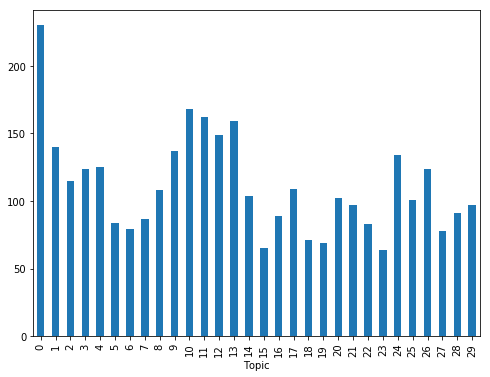

In [51]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
claim2topic.groupby('Topic').Claim.count().plot.bar(ylim=0)
plt.show()

let's make a function so it's easier to experiment and visualise correctness

In [52]:
def train_model_claim(clean_content, num_topics=30, filter_b = 15, filter_a = 0.1):
    dictionary = gensim.corpora.Dictionary(clean_content)
    dictionary.filter_extremes(no_below=filter_b, no_above=filter_a, keep_n= 100000)
    bow_corpus = [dictionary.doc2bow(doc) for doc in clean_content]
    lda_model =  gensim.models.LdaMulticore(bow_corpus, 
                                       num_topics = num_topics, 
                                       id2word = dictionary,                                    
                                       passes = 10,
                                       workers = 2)
    topics = []
    for idx, topic in lda_model.print_topics(-1):
        topics.append(topic)
    m = lda_model.get_document_topics(bow_corpus)
    matches = np.zeros(30)
    data = []
    for i in range(len(m)):
        prob_topics = m[i]
        if prob_topics:
            matches[prob_topics[0][0]] += 1
            prob_topics.sort(key=lambda x: x[1], reverse=True)
            data.append([df_new['Claim'][i], prob_topics[0][0], topics[prob_topics[0][0]] ])
    claim2topic = pd.DataFrame(data=data, columns = ['Claim', 'Topic', 'TopicKeyWords'])
    return claim2topic
#m.sort(key=lambda x: x[1], reverse=True)

In [53]:
#df_copy = df[['Claim', 'Explaination', 'Label', 'Source_Lang']].copy()
#df_copy.to_excel('debunk_label.xlsx')

In [54]:
rumours_labelled = pd.read_excel('debunk_label.xlsx')
rumours_labelled.drop(['Topics'], axis=1)
rumours_labelled.dropna()

,Column1,Claim,Explaination,Label,Source_Lang,Category,Topics
0,0,Chinese state media claims Ghana’s coronaviru...,Official Ghana government data contradicts the...,FALSE,en,Community spread and impact,"Public authority actions, policy, and communic..."
2,2,Coronavirus can be avoided by eating nigella ...,Hydroxychloroquine is not present in the subst...,FALSE,hi,"Vaccines, medical treatments, and tests",Medical advice and self-treatments
3,3,ICMR issued a report claiming the number of p...,ICMR did not publish any such report about the...,FALSE,en,Community spread and impact,Claims about prominent actors
4,4,Sanitize masks by microwaving them for 2-3 mi...,Fabric masks should not be sanitized by microw...,FALSE,hi,"Vaccines, medical treatments, and tests",Conspiracy theories
5,5,Hindu man in Rajasthan killed by Muslims amid...,The video is originally from Pakistan where a ...,FALSE,en,"Public preparedness, protests, and civil disob...",Virus transmission
6,6,Israel has no deaths from COVID-19; tea made ...,The post claiming Israel has no deaths from CO...,FALSE,hi,"Vaccines, medical treatments, and tests",Virus origin and properties
7,7,Mustard oil can kill coronavirus.\t\t,"No, Mustard oil cannot cure coronavirus; howev...",FALSE,hi,"Vaccines, medical treatments, and tests","Public preparedness, protests, and civil disob..."
8,8,Pak PM Imran Khan’s wife tested positive for ...,Morphed newscard of popular Indian news channe...,FALSE,ml,Claims about prominent actors,"Vaccines, medical treatments, and tests"


In [55]:
rumours_labelled.shape

(3345, 7)

In [56]:
claim2topic[rumours_labelled['Category'] == 'Medical advice and self-treatments']

,Claim,Topic,TopicKeyWords
19,Mustard oil can kill coronavirus,13,"0.166*""kill"" + 0.156*""water"" + 0.107*""drink"" +..."
27,Israel has no deaths from COVID tea made...,26,"0.256*""vaccin"" + 0.085*""develop"" + 0.075*""comp..."
45,The new coronavirus pH varies from to ...,14,"0.071*""social"" + 0.070*""medium"" + 0.053*""disea..."
231,Homemade masks prevent the spread of coronav...,20,"0.175*""mask"" + 0.077*""face"" + 0.069*""wear"" + 0..."
1412,Andhra Pradesh Chief Minister YS Jagan Reddy...,16,"0.188*""lockdown"" + 0.181*""india"" + 0.098*""clai..."
1915,Research made by scientists from the Univers...,2,"0.118*""imag"" + 0.073*""patient"" + 0.068*""human""..."


In [57]:
rumours_labelled[claim2topic['Topic']==0]

,Column1,Claim,Explaination,Label,Source_Lang,Category,Topics
31,31,"In new interview to Fox, President Trump sugg...","In the entire interview, many questions were a...",FALSE,hi,NaN,NaN
37,37,Tedros Adhanom Ghebreyesus said that “abortio...,Ghebreyesus has not said this and the quote co...,Misleading,es,NaN,NaN
39,39,Colombian President Iván Duque was ranked thi...,This ranking does not exist.,False,es,NaN,NaN
105,105,President Emmanuel Macron was cheered by a cr...,The company in charge of renting the appartmen...,FALSE,fr,NaN,NaN
119,119,COVID-19 is immune to organisms with a pH gre...,But no national or international health author...,False,es,NaN,NaN
135,135,Queen Elizabeth said Philippine President Rod...,Queen Elizabeth delivered a speech addressing ...,Pants on Fire!,en,Claims about prominent actors,NaN
167,167,Former NYC Mayor Rudolph Giuliani said he “bo...,While Novartis paid Giuliani a speaker’s fee i...,False,en,NaN,NaN
186,186,The NBA is asking President Donald Trump to “...,There is no evidence NBA players voted to susp...,Pants on Fire!,en,Claims about prominent actors,NaN
193,193,President Donald Trump’s statement that lupus...,Oskoui's remarks ignore the fact that lupus is...,False,en,Claims about prominent actors,NaN
200,200,Church asked an imam of a mosque to call for ...,The video is from 2015 and is not related to C...,False,ar,NaN,NaN


In [58]:
claim2topic[rumours_labelled['Category'] == 'Vaccines, medical treatments, and tests']

,Claim,Topic,TopicKeyWords
2,Coronavirus can be avoided by eating nigella...,17,"0.195*""outbreak"" + 0.054*""disinfect"" + 0.052*""..."
4,Sanitize masks by microwaving them for m...,18,"0.094*""video"" + 0.079*""show"" + 0.055*""hand"" + ..."
6,Israel has no deaths from COVID tea made...,26,"0.256*""vaccin"" + 0.085*""develop"" + 0.075*""comp..."
7,Mustard oil can kill coronavirus,13,"0.166*""kill"" + 0.156*""water"" + 0.107*""drink"" +..."
1186,A WhatsApp forward has gone viral which clai...,17,"0.195*""outbreak"" + 0.054*""disinfect"" + 0.052*""..."
1187,A WhatsApp forward claims that the COVID ...,26,"0.256*""vaccin"" + 0.085*""develop"" + 0.075*""comp..."
2373,Israel creates a vaccine for the coronavirus,26,"0.256*""vaccin"" + 0.085*""develop"" + 0.075*""comp..."
2374,Dr Lupita Yamamoto has found a vaccine that...,26,"0.256*""vaccin"" + 0.085*""develop"" + 0.075*""comp..."
2397,Israel creates a vaccine for the coronavirus,26,"0.256*""vaccin"" + 0.085*""develop"" + 0.075*""comp..."
2398,Dr Lupita Yamamoto has found a vaccine that...,26,"0.256*""vaccin"" + 0.085*""develop"" + 0.075*""comp..."


In [59]:
claim2topic20 = train_model_claim(clean_content, num_topics=20)

In [60]:
claim2topic20[rumours_labelled['Category'] == 'Vaccines, medical treatments, and tests']

,Claim,Topic,TopicKeyWords
2,Coronavirus can be avoided by eating nigella...,10,"0.086*""help"" + 0.049*""chloroquin"" + 0.042*""cur..."
4,Sanitize masks by microwaving them for m...,7,"0.059*""viru"" + 0.049*""ministri"" + 0.038*""paten..."
6,Israel has no deaths from COVID tea made...,17,"0.203*""cure"" + 0.118*""vaccin"" + 0.062*""found"" ..."
7,Mustard oil can kill coronavirus,1,"0.100*""kill"" + 0.077*""said"" + 0.062*""death"" + ..."
1186,A WhatsApp forward has gone viral which clai...,0,"0.098*""hospit"" + 0.072*""claim"" + 0.061*""patien..."
1187,A WhatsApp forward claims that the COVID ...,0,"0.098*""hospit"" + 0.072*""claim"" + 0.061*""patien..."
2373,Israel creates a vaccine for the coronavirus,17,"0.203*""cure"" + 0.118*""vaccin"" + 0.062*""found"" ..."
2374,Dr Lupita Yamamoto has found a vaccine that...,17,"0.203*""cure"" + 0.118*""vaccin"" + 0.062*""found"" ..."
2397,Israel creates a vaccine for the coronavirus,17,"0.203*""cure"" + 0.118*""vaccin"" + 0.062*""found"" ..."
2398,Dr Lupita Yamamoto has found a vaccine that...,17,"0.203*""cure"" + 0.118*""vaccin"" + 0.062*""found"" ..."


In [62]:
claim2topic20[claim2topic20.Topic == 17]

,Claim,Topic,TopicKeyWords
6,Israel has no deaths from COVID tea made...,17,"0.203*""cure"" + 0.118*""vaccin"" + 0.062*""found"" ..."
17,Coffee can cure Covid,17,"0.203*""cure"" + 0.118*""vaccin"" + 0.062*""found"" ..."
27,Israel has no deaths from COVID tea made...,17,"0.203*""cure"" + 0.118*""vaccin"" + 0.062*""found"" ..."
30,Chlorine dioxide or Miracle Mineral Solutio...,17,"0.203*""cure"" + 0.118*""vaccin"" + 0.062*""found"" ..."
54,Green tea can cure COVID,17,"0.203*""cure"" + 0.118*""vaccin"" + 0.062*""found"" ..."
75,MMS essential oils are cures for the corona...,17,"0.203*""cure"" + 0.118*""vaccin"" + 0.062*""found"" ..."
82,Black body bags being referred to as deaths ...,17,"0.203*""cure"" + 0.118*""vaccin"" + 0.062*""found"" ..."
95,Coronavirus will be exterminated if lockdown...,17,"0.203*""cure"" + 0.118*""vaccin"" + 0.062*""found"" ..."
100,This protein is a cure against COVID,17,"0.203*""cure"" + 0.118*""vaccin"" + 0.062*""found"" ..."
129,The WHO has issued a protocol for lockdown e...,17,"0.203*""cure"" + 0.118*""vaccin"" + 0.062*""found"" ..."


testing NLP for classifying by topic covid tweets



In [61]:
from elasticsearch import Elasticsearch
elastic_client = Elasticsearch(hosts=["http://143.167.8.152:9300"], http_auth=('students', 'foxtrot'))

def random_rumours(amount, categories):    
    fiveg = ["5g",  "5gcoronavirus", "coronavirus5g"]
    chinesevirus = ["chinaliedandpeopledied",  "chinaliedpeopledied",  "chinaliespeopledied", "chinesebioterrorism",  "chinesevirus", "wuhanvirus", "ccpvirus", "kungflu"]
    americavirus = ["americavirus", "ciavirus",  "deepstatevirus", "sorosvirus"]
    endlockdown = ["endthelockdown", "endthelockdownuk", "reopenbritain"]
    newworldorder = ["preventnwo",  "nwoevilelites", "nwovirus", "nwo", "greatreset", "resistthegreatreset", "nwoevilplans", "depopulation"]
    gatesvirus = ["gatesvirus"]
    wholied = ["wholiedpeopledied"]
    israelvirus = ["israelvirus"]
    generalrumour = ["coronabollocks", "coronacon",   "coronafakenews",  "coronafraud", "coronahoax", "cronyvirus", "scamdemic", "plandemic"]
    antifakenews = ["coronavirusfacts",  "coronafacts", "covidiots"]
    emptyhospitals = ["filmyourhospital", "filmyourhospitals"]
    antivax = ["idonotconsent"]
    medical = ["astrazeneca", "covid19symptoms", "covidsymptoms", "oxfordvaccine", "hydroxichloroquine", "hydroxychloroquine", "coronasymptoms"]
    antiestablishment = ["coronaviruscoverup", "coronavillains", "depopulation"]
   
    def f(x):
        return {
            "fiveg": (fiveg, float(x[1])),
            "chinesevirus": (chinesevirus, float(x[1])),
            "americavirus": (americavirus, float(x[1])),
            "endlockdown": (endlockdown, float(x[1])),
            "newworldorder": (newworldorder, float(x[1])),
            "gatesvirus": (gatesvirus, float(x[1])),
            "wholied": (wholied, float(x[1])),
            "israelvirus": (israelvirus, float(x[1])),
            "generalrumour": (generalrumour, float(x[1])),
            "antifakenews": (antifakenews, float(x[1])),
            "emptyhospitals": (emptyhospitals, float(x[1])),
            "antivax": (antivax, float(x[1])),
            "medical": (medical, float(x[1])),
            "antiestablishment": (antiestablishment, float(x[1]))
        }[x[0]]

    must_array = [{"match": {"is_a_retweet": "false"}}, {"match": {"is_a_quote": "false"}}]
    for x in categories:
        query = f(x)
        must_array.append({"terms": {"hashtags": query[0], "boost": query[1]}})
        
    query_body = {
      "query": {
        "function_score": {
          "query": {
            "bool": {
              "must": must_array,
              "must_not": [
                {"match": {"hashtags": "obamagate"}},
                {"exists": {"field": "in_reply_to_user_id"}},
                {"exists": {"field": "in_reply_to_status_id"}},
                {"exists": {"field": "in_reply_to_screen_name"}},
                {"match": {"message": "*media_url*"}}
              ]
            }
          },
          "random_score": {}
        }
      }
    }

    
    result = elastic_client.search(index="covid19_misinfo_index", body=query_body, size=amount, request_timeout=30000, _source="tweet_text,tweet_id")

    all_hits = result['hits']['hits']
    
    tweets = []
    for num, doc in enumerate(all_hits):
        tweets.append(doc["_source"]["tweet_text"])
    return tweets    

In [81]:
rums = random_rumours(3000, [("fiveg","0.5"), ("chinesevirus","1.0")])

In [119]:
import preprocessor as p
import re
p.set_options(p.OPT.URL, p.OPT.EMOJI)
cleaned_tweets = []
for tweet in rums:
    cleaned_tweets.append(re.sub('[_\W\d]', ' ', p.clean(tweet)))
cleaned_tweets

['France won t ban  Huawei but favors European   G systems for security reasons  BoycottChina  BoycottChineseProducts  BoycottMadeInChina  SanctionChina  Chinamustfall  ChinaLiedPeopleDied',
 'How to make money from Facebook via  BildungGlobal  COVID     G  iStandWithPastorchris  WHO  WhatTrumpHasTaughtUs  lockdownextension  ChinaLiedPeopleDied  KunaHopeTutawin  BREAKING  ImamOfPeace  RenosNuggets',
 'Bill Gates Explains What Separates Successful Leaders From Everyone Else in   Words  MAGA  PizzaGate  BillGatesVirus  COVID    covid  uk  ChineseVirus   G   GCoronavirus  WWG WGA  TheStormIsHere',
 'Wall Street is fake  What is MSNBC and CNN and C SPAN going to do about it  Are they going to continue giving us fake news   cspanwj  realDonaldTrump  news  facebook  ChineseVirus   G   GCoronavirus   GTOWERS  BillGatesVirus  dow  NASDAQ  WallStreet  Trump  Marketing  market',
 'Could it be that high  stress normal  fluvirus or underlying illnesses or perhaps   G could be responsible for initi

In [83]:
prep_tweets = clean_text(cleaned_tweets)
prep_tweets

[['franc',
  'huawei',
  'favor',
  'european',
  'system',
  'secur',
  'reason',
  'boycottchina',
  'boycottchineseproduct',
  'boycottmadeinchina',
  'sanctionchina',
  'chinamustfal',
  'chinaliedpeopledi'],
 ['make',
  'money',
  'facebook',
  'bildungglob',
  'covid',
  'istandwithpastorchri',
  'whattrumphastaughtu',
  'lockdownextens',
  'chinaliedpeopledi',
  'kunahopetutawin',
  'break',
  'imamofpeac',
  'renosnugget'],
 ['bill',
  'gate',
  'explain',
  'what',
  'separ',
  'success',
  'leader',
  'from',
  'everyon',
  'word',
  'maga',
  'pizzag',
  'billgatesviru',
  'covid',
  'covid',
  'chineseviru',
  'gcoronaviru',
  'thestormisher'],
 ['wall',
  'street',
  'fake',
  'what',
  'msnbc',
  'span',
  'continu',
  'give',
  'fake',
  'news',
  'cspanwj',
  'realdonaldtrump',
  'news',
  'facebook',
  'chineseviru',
  'gcoronaviru',
  'gtower',
  'billgatesviru',
  'nasdaq',
  'wallstreet',
  'trump',
  'market',
  'market'],
 ['could',
  'high',
  'stress',
  'normal

In [131]:
import numpy as np
import nltk
from nltk.tokenize import word_tokenize 
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.lancaster import LancasterStemmer
import string
import gensim
from nltk.tokenize import sent_tokenize
from nltk.stem import WordNetLemmatizer

def clean_text1(content_collection):
    wordnet_lemmatizer = WordNetLemmatizer()
    porter = PorterStemmer()
    lan_porter = LancasterStemmer()
    stop_words = set(stopwords.words('english'))
    clean_content=[]
    for content in content_collection:
        #turn string into tokens
        word_tokens = word_tokenize(content)
        words = [porter.stem(wordnet_lemmatizer.lemmatize(w.lower())) for w in word_tokens if w not in stop_words] #remove stop words
        #lowercase, remove stop words and punctuation/numbers
        clean_content.append( [w for w in words if len(w) > 3] ) 
    return clean_content

def train_model(clean_content, num_topics=30, filter_b = 15, filter_a = 0.1):
    dictionary = gensim.corpora.Dictionary(clean_content)
    dictionary.filter_extremes(no_below=filter_b, no_above=filter_a, keep_n= 100000)
    bow_corpus = [dictionary.doc2bow(doc) for doc in clean_content]
    lda_model =  gensim.models.LdaMulticore(bow_corpus, 
                                       num_topics = num_topics, 
                                       id2word = dictionary,                                    
                                       passes = 10,
                                       workers = 2)
    topics = []
    for idx, topic in lda_model.print_topics(-1):
        topics.append(topic)
    m = lda_model.get_document_topics(bow_corpus)
    matches = np.zeros(30)
    data = []
    for i in range(len(m)):
        prob_topics = m[i]
        if prob_topics:
            prob_topics.sort(key=lambda x: x[1], reverse=True)
            data.append([rums[i], prob_topics[0][0], topics[prob_topics[0][0]] ])
    claim2topic = pd.DataFrame(data=data, columns = ['Claim', 'Topic', 'TopicKeyWords'])
    return claim2topic
prep_tweets = clean_text1(cleaned_tweets)
claim2topic = train_model(prep_tweets, num_topics=20, filter_b=15, filter_a=0.2)

In [132]:
claim2topic.head()

,Claim,Topic,TopicKeyWords
0,France won't ban #Huawei but favors European #...,7,"0.059*""boycottchina"" + 0.049*""chinamustfal"" + ..."
1,How to make money from Facebook https://t.co/m...,12,"0.031*""chinaliedandpeopledi"" + 0.026*""bioweapo..."
2,Bill Gates Explains What Separates Successful ...,5,"0.056*""chinaliedandpeopledi"" + 0.035*""gcoronav..."
3,Wall Street is fake. What is MSNBC and CNN and...,2,"0.047*""trump"" + 0.042*""news"" + 0.038*""gcoronav..."
4,Could it be that high #stress normal #fluvirus...,19,"0.029*""chines"" + 0.023*""telecom"" + 0.022*""taiw..."
